Fashion MNIST Classification



In [47]:
#Fashion MNIST Classification
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [48]:
#Load the dataset
(train_images,train_labels),(test_images,test_lables)= fashion_mnist.load_data()

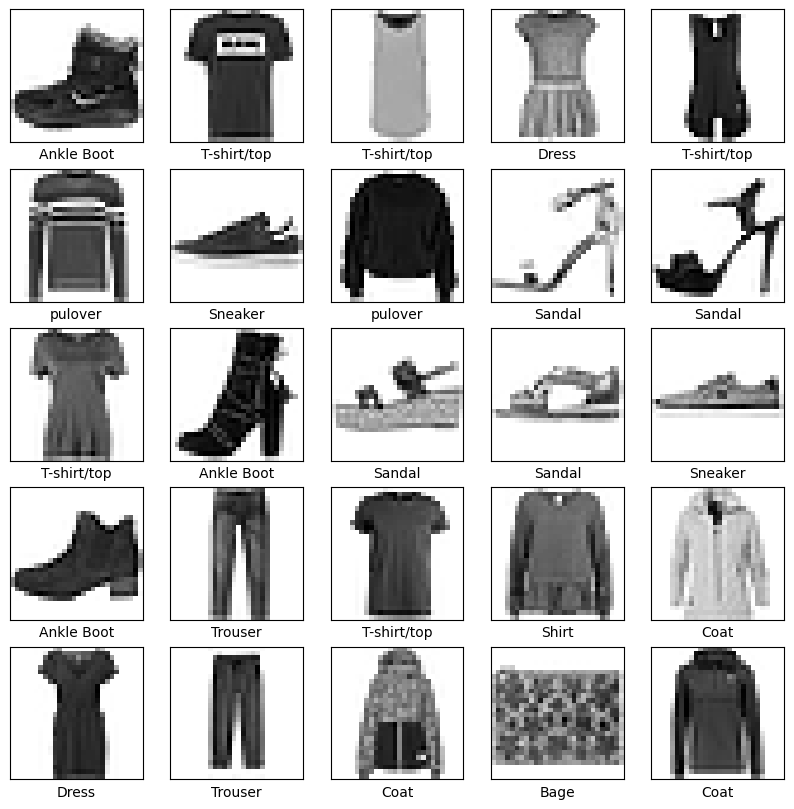

In [49]:
#Visulizing the data
class_names=['T-shirt/top','Trouser','pulover','Dress','Coat','Sandal','Shirt','Sneaker','Bage','Ankle Boot']
import numpy as np
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
 # plt.xlabel(class_names[np.argmax(train_labels[i])])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
#normalize the image pixel value from [0,255] to [-1,1]
train_images=(train_images /127.5)-1
test_images=(test_images /127.5)-1

In [51]:
#Convert labels to one-hot encoding
train_labels= to_categorical(train_labels)
test_lables=  to_categorical(test_lables)

In [52]:
#One-hot Encoding Concept
train_labels[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
#create a simple neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
])

In [54]:
#compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
#Train the model
history= model.fit(
    train_images,
    train_labels,
    epochs=50,
    validation_data=(test_images,test_lables)
)

Epoch 1/50
1875/1875 [==============================] - 17s 8ms/step - loss: 0.6842 - accuracy: 0.7537 - val_loss: 0.4718 - val_accuracy: 0.8288
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5068 - accuracy: 0.8168 - val_loss: 0.4590 - val_accuracy: 0.8339
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4779 - accuracy: 0.8266 - val_loss: 0.4451 - val_accuracy: 0.8406
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4549 - accuracy: 0.8347 - val_loss: 0.4535 - val_accuracy: 0.8360
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4471 - accuracy: 0.8371 - val_loss: 0.4207 - val_accuracy: 0.8515
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4316 - accuracy: 0.8434 - val_loss: 0.4076 - val_accuracy: 0.8530
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4201 - accuracy: 0.8465 - val_loss: 0.4171 - val_accur

Text(0.5, 1.0, 'Accuracy Evalution')

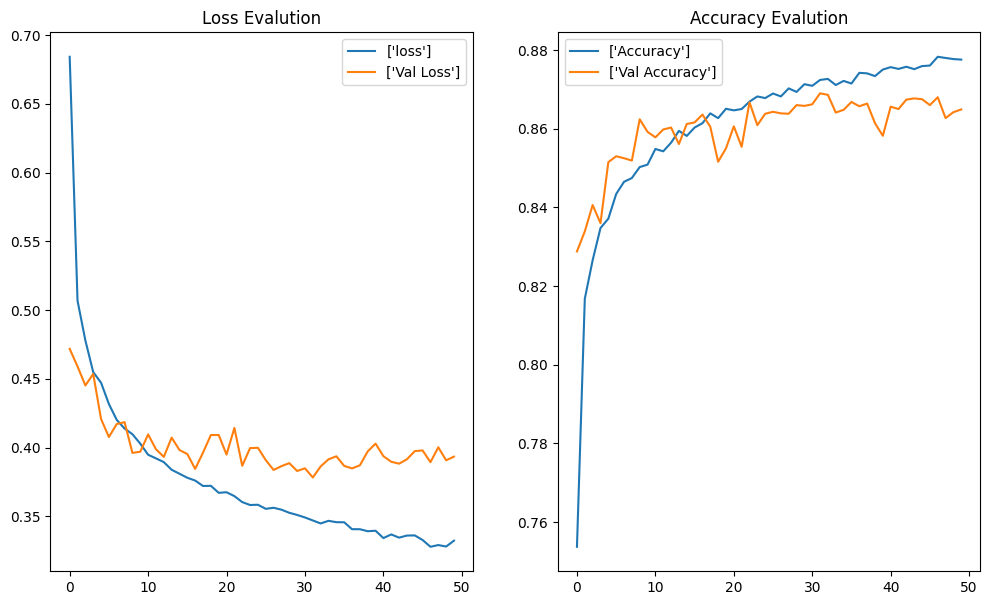

In [56]:
#Visulization of Loss & Accuracy
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label=['loss'])
plt.plot(history.history['val_loss'],label=['Val Loss'])
plt.legend()
plt.title('Loss Evalution')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label=['Accuracy'])
plt.plot(history.history['val_accuracy'],label=['Val Accuracy'])
plt.legend()
plt.title('Accuracy Evalution')

313/313 [==============================] - 2s 7ms/step


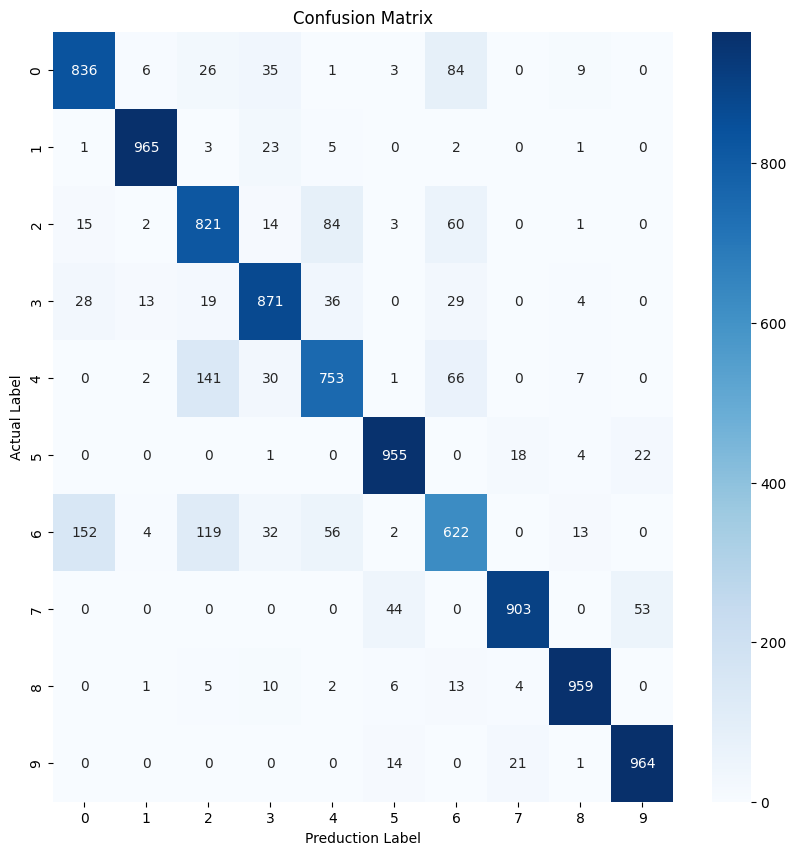

In [57]:
#Visuliation of confusion martix to understand the performance in different classes
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred= model.predict(test_images)
y_pred_classes= np.argmax(y_pred, axis=1)
y_true= np.argmax(test_lables,axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Preduction Label')
plt.show()